In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('E:\diamonds.csv', index_col = 0)

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.shape

(53940, 10)

In [5]:
df = df[(df.x!=0) & (df.y!=0) & (df.z!=0)]

In [6]:
df.shape

(53920, 10)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
y = df.price
X = df.drop('price',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder  #
from sklearn.compose import ColumnTransformer  #позволяет разным столбцам трансформироваться отдельно друг от друга
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(3,include_bias=False))
    ])

start_pipe = ColumnTransformer([
        ("numeric", StandardScaler(), ['carat','depth','table']),
        ("categorial", OneHotEncoder(), ['cut','color','clarity']),
        ("poly", poly_pipeline, ['x','y','z']),
        ])

In [12]:
start_pipe

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numeric',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['carat', 'depth', 'table']),
                                ('categorial',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['cut', 'color', 'clarity']),
                                ('poly',
                                 Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=3,
         

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold 

pipe = Pipeline([('preprocessing', start_pipe),
                 ('preprocessing2',StandardScaler()),
                 ('regresion', ElasticNet(tol = 0.1))])

cv=ShuffleSplit(n_splits=10,  test_size=0.3, train_size=0.7)
param_grid =[
    {'regresion__l1_ratio': [.1, .5, .7, .9, .95, 0.99, 1],
     'regresion__alpha': [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)]
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("R-квадрат adjusted для наилучшей модели кроссвалидации на проверочных тренировочных наборах: {:.6f}\n".format(grid.best_score_))
print("R-квадрат на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Словарь с параметрами для лучшего решения:
{'regresion__alpha': 0.01, 'regresion__l1_ratio': 1}

R-квадрат adjusted для наилучшей модели кроссвалидации на проверочных тренировочных наборах: 0.912022

R-квадрат на тестовом наборе: 0.91


,34,27,20,13,6,5,4,12,3,2,...,33,24,23,32,22,21,31,30,29,28
mean_fit_time,0.115391,0.108011,0.113995,0.113696,0.117485,0.115291,0.117386,0.109307,0.109108,0.112599,...,0.10851,0.109008,0.129354,0.108809,0.111801,0.109507,0.110556,0.113496,0.124566,0.119581
std_fit_time,0.0162417,0.00178675,0.0126551,0.00867222,0.00606321,0.00455265,0.00576434,0.00127711,0.00357386,0.00464486,...,0.00159572,0.00126558,0.0182281,0.00206581,0.00338062,0.00193393,0.00658209,0.00910587,0.0160095,0.0161459
mean_score_time,0.0235375,0.0216427,0.0226397,0.0241357,0.0241361,0.023338,0.0239363,0.0221414,0.022939,0.0226398,...,0.0219417,0.0221412,0.0256316,0.0221411,0.0231385,0.0219421,0.0214839,0.0230389,0.025632,0.0241345
std_score_time,0.00309659,0.000456867,0.000897453,0.00496245,0.00171618,0.00119674,0.00178398,0.000598399,0.000446168,0.00154808,...,0.000996924,0.000746283,0.0034557,0.000398995,0.000746353,0.000772201,0.00418296,0.00201669,0.00439359,0.00345008
param_regresion__alpha,0.01,0.001,0.0001,1e-05,1e-06,1e-06,1e-06,1e-05,1e-06,1e-06,...,0.01,0.001,0.001,0.01,0.001,0.001,0.01,0.01,0.01,0.01
param_regresion__l1_ratio,1,1,1,1,1,0.99,0.95,0.99,0.9,0.7,...,0.99,0.9,0.7,0.95,0.5,0.1,0.9,0.7,0.5,0.1
params,"{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.0001, 'regresion__l1_ra...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...",...,"{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati..."
split0_test_score,0.910214,0.910214,0.910214,0.910214,0.910214,0.910214,0.910214,0.910214,0.910214,0.910214,...,0.910207,0.910207,0.910194,0.91018,0.91018,0.910153,0.910147,0.91001,0.90987,0.90958
split1_test_score,0.911683,0.911683,0.911683,0.911683,0.911683,0.911683,0.911683,0.911683,0.911683,0.911683,...,0.911678,0.911678,0.911667,0.911656,0.911656,0.911634,0.911629,0.911517,0.911401,0.911157
split2_test_score,0.914405,0.914405,0.914405,0.914405,0.914405,0.914405,0.914405,0.914405,0.914405,0.914405,...,0.9144,0.914399,0.914388,0.914377,0.914377,0.914354,0.914348,0.914232,0.914111,0.913859


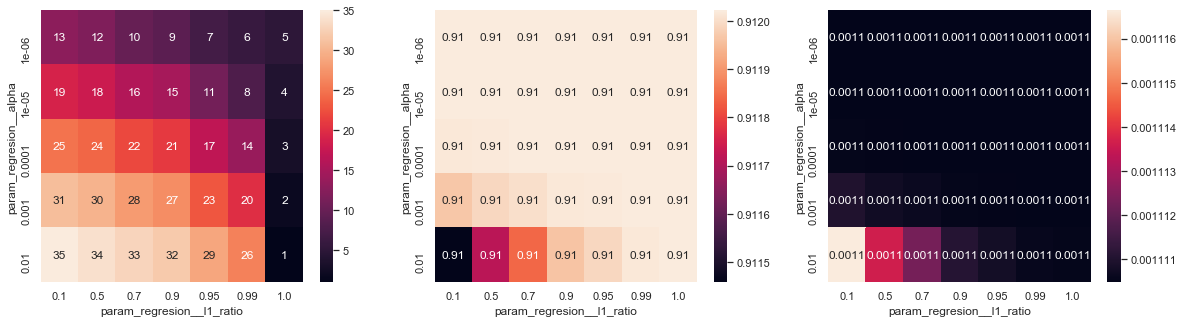

In [14]:
import seaborn as sns 
sns.set()
fig,ax = plt.subplots(1, 3, figsize=(20,5))

ax = plt.subplot(1, 3, 1)
pvt_rank = gridresults.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'rank_test_score')
sns.heatmap(pvt_rank,annot=True);
ax = plt.subplot(1, 3, 2)
pvt_mean = gridresults.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'mean_test_score')
sns.heatmap(pvt_mean,annot=True);
ax = plt.subplot(1, 3, 3)
pvt_std = gridresults.pivot(index = 'param_regresion__alpha', columns ='param_regresion__l1_ratio',
                            values = 'std_test_score')
sns.heatmap(pvt_std,annot=True);

In [15]:
grid.best_params_

{'regresion__alpha': 0.01, 'regresion__l1_ratio': 1}

In [16]:
grid.best_score_

0.9120220870247872

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
model = grid.best_estimator_

In [19]:
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
RMSE

1170.2661313273493